In [1]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import pycuda.driver as drv
import pycuda.tools
import pycuda.autoinit
from pycuda.compiler import SourceModule
import numpy as np
import scipy.misc as scm
import time

from skimage.filters import threshold_otsu, threshold_adaptive
#from myCudaModule import rgb2gray,expGPUenhancement,expGPUthresholding
import myCudaModule as mcm

import os

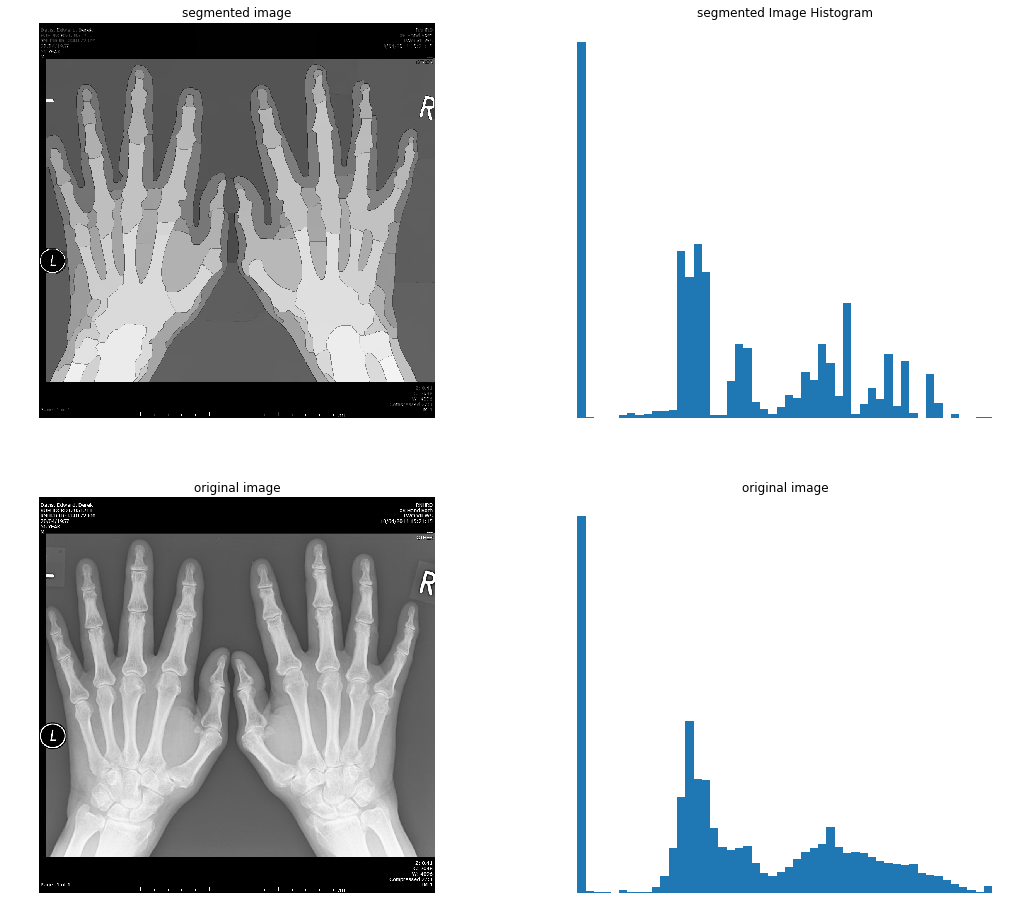

In [2]:
patientID = "546h2016"




########################################################################
### smoothing the image with the fastms code ###########################
########################################################################

originalImage = scm.imread('/home/amr62/Documents/TheEffingPhDHatersGonnaHate/fastmsToying/trialimages/546h2016_1_0.jpg').astype(np.float32)
originalImage = mcm.grayfication(originalImage)
#lambdastr = str(input("enter value of lambda: "))
#order66  = "cd /home/amr62/fastms; ./main -edges 0 -i /home/amr62/Documents/TheEffingPhDHatersGonnaHate/fastmsToying/trialimages/"+patientID+"_1_0.jpg -alpha -1 -lambda "+ lambdastr+" -show 0  " 
#os.system(order66) # this works
#os.system("sh order66.sh") # this works
segmentedIM = scm.imread('546h2016_1_0__result_alphaInfinity_lambda0.35_edges.png').astype(np.float32)

#imagetoloadStr = "/home/amr62/Documents/TheEffingPhDHatersGonnaHate/fastmsToying/trialimages/"+patientID+"_1_0__result_alphaInfinity_lambda"+lambdastr+".png"
#segmentedIM    = scm.imread(imagetoloadStr).astype(np.float32)
segmentedIM    = mcm.grayfication(segmentedIM)
%matplotlib inline

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax0 = fig.add_subplot(221)
ax0.imshow(segmentedIM,cmap='Greys_r')
ax0.set_title('segmented image')
ax0.axis('off')     
     
ax1 = fig.add_subplot(222)
ax1.hist(segmentedIM.ravel(),bins=50)
ax1.set_title('segmented Image Histogram')
ax1.axis('off')

ax2 = fig.add_subplot(223)
ax2.imshow(originalImage,cmap='Greys_r')
ax2.set_title('original image')
ax2.axis('off')

ax3 = fig.add_subplot(224)
ax3.hist(originalImage.ravel(),bins=50)
ax3.set_title('original image')
ax3.axis('off')

plt.show()

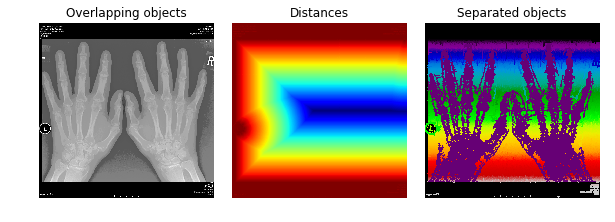

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = originalImage

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.7), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax0, ax1, ax2 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Overlapping objects')
ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title('Distances')
ax2.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title('Separated objects')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()